In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load haberman.csv into a pandas dataFrame.

haber = pd.read_csv("D:\Machine_Learning\my_practice\haberman.csv", names=['Age','operation_yr','Axil_Nodes','Survival_Status'])  

In [9]:
#(Q) how many data-points and features?
print(haber.shape)  #printing the shape

(306, 4)


In [7]:
print(haber.columns) #printig the columns
haber['Survival_Status']= haber['Survival_Status'].map({1:'survived',2:'died'})
print(haber)
haber.info() #to check null values exist or not

Index(['Age', 'operation_yr', 'Axil_Nodes', 'Survival_Status'], dtype='object')
     Age  operation_yr  Axil_Nodes Survival_Status
0     30            64           1        survived
1     30            62           3        survived
2     30            65           0        survived
3     31            59           2        survived
4     31            65           4        survived
5     33            58          10        survived
6     33            60           0        survived
7     34            59           0            died
8     34            66           9            died
9     34            58          30        survived
10    34            60           1        survived
11    34            61          10        survived
12    34            67           7        survived
13    34            60           0        survived
14    35            64          13        survived
15    35            63           0        survived
16    36            60           1        survived
17

In [ ]:
# Plot KDE for V17 values that belong to Class 0 (Normal)
sns.kdeplot(data=original_data[original_data['Class'] == 0]['V17'], label="Class 0", shade=True)    #should be edited

In [131]:
haber['30'].value_counts() #age
#haber['1'].value_counts()  #axil nodes
haber['1.1'].value_counts() # survival status
#haber['64'].value_counts() # operation year
#age.value_counts()


1    224
2     81
Name: 1.1, dtype: int64

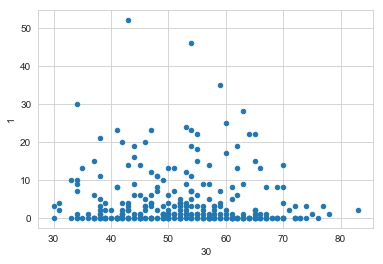

In [53]:
haber.plot(kind='scatter',x='30',y='1')
plt.show()                              #x=age,y=axil_nodes

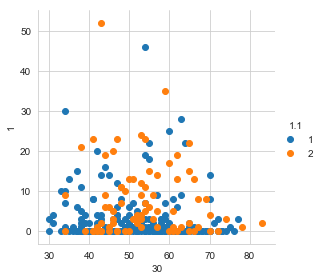

In [130]:
sns.set_style("whitegrid");
sns.FacetGrid(haber,hue="1.1"  ,height=4) \
   .map(plt.scatter, "30", "1") \
   .add_legend();                   #x=age, y=axil_nodes
plt.show();

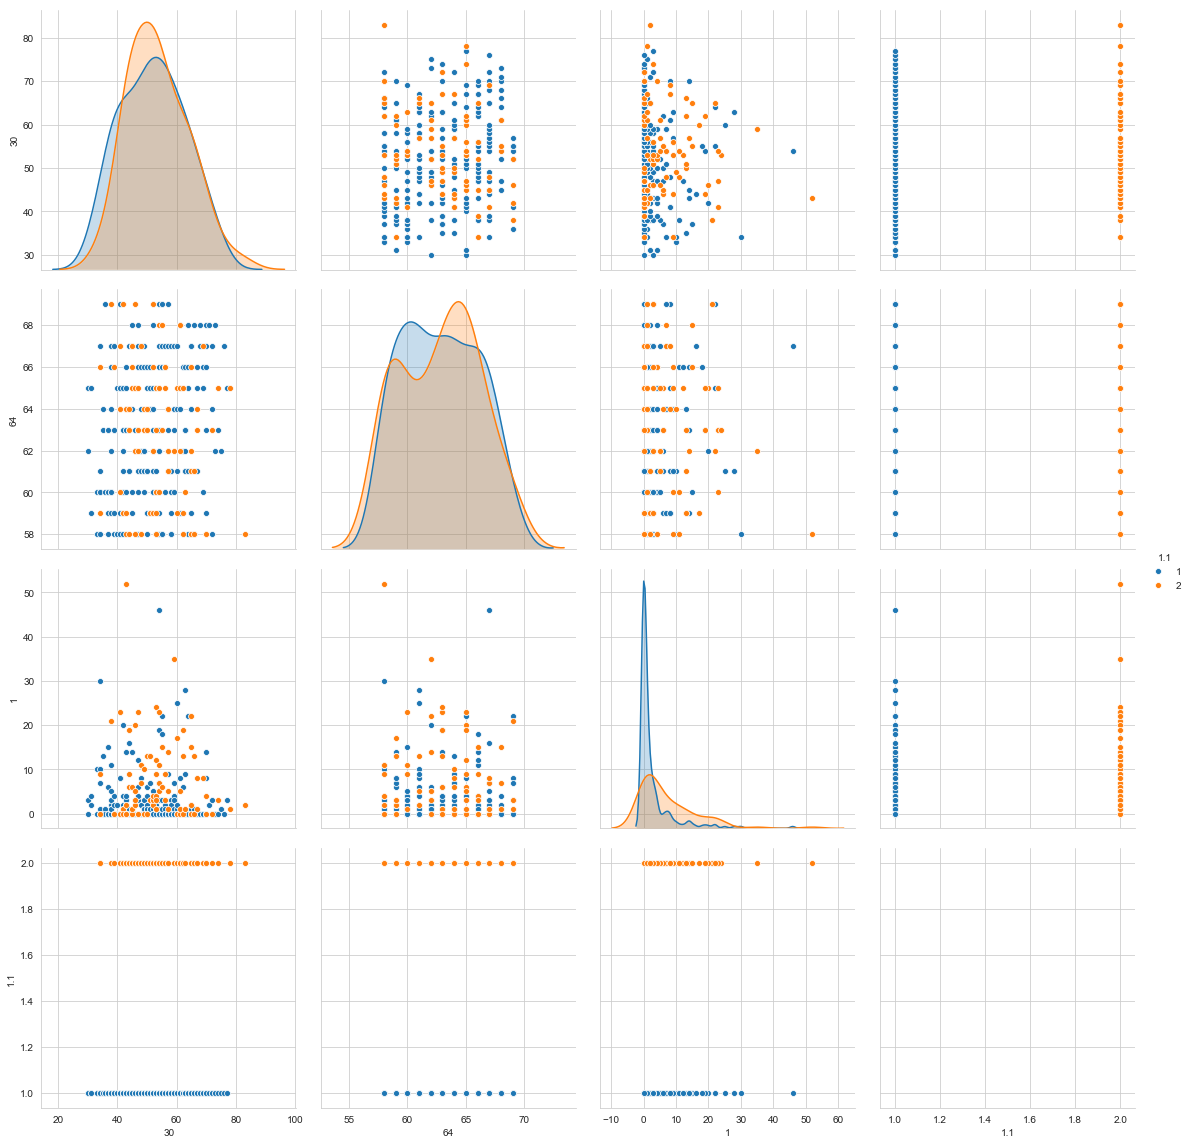

In [118]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haber,hue='1.1',height=4);
plt.show();

year (64) and survival_status (1.1) are linearly seperable
age(30) and axil nodes are linearly seperable but the points are overlap each other

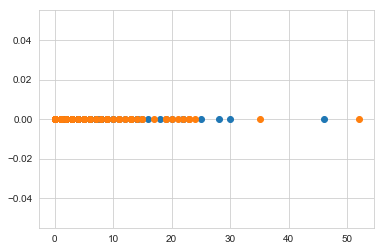

In [73]:
import numpy as np

haber_1= haber.loc[haber["1.1"]==1];
haber_2=haber.loc[haber["1.1"]==2];

plt.plot(haber_1["1"],np.zeros_like(haber_1["1"]),'o')
plt.plot(haber_2["1"],np.zeros_like(haber_2["1"]),'o')
plt.show();

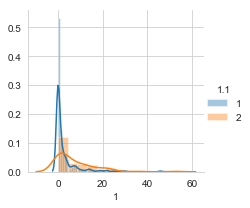

In [58]:
sns.FacetGrid(haber,hue="1.1",height=3) \
    .map(sns.distplot,"1")\
    .add_legend();                        # axil_node as parametre
plt.show();


taking axil node as parametre:
* survival staus_1 is more compare to survival status_2 count.
*max<=0.3 for survival status_1

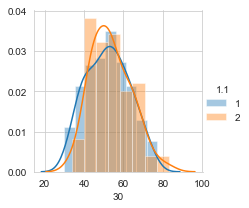

In [59]:
sns.FacetGrid(haber,hue="1.1",height=3) \
    .map(sns.distplot,"30") \
    .add_legend();                    #age as parametre
plt.show();

taking age as parametre:
*the count of survival status_2 is more in count when compare to survival status_1

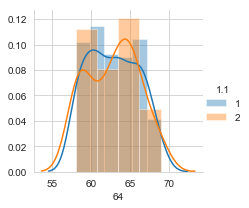

In [60]:
sns.FacetGrid(haber,hue="1.1",height=3) \
    .map(sns.distplot,"64") \
    .add_legend();                     #year as parametre
plt.show();

taking year as parametre:
*dont see much difference in count of survival status1&2

[0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


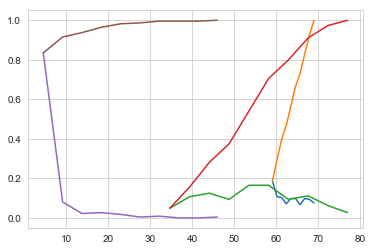

In [123]:
#cdf,pdf of year where survival status is 1

count, bin_edges = np.histogram(haber_1["64"], bins=10,density= True)
pdf = count/(sum(count))
print(pdf)
print(bin_edges)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#cdf,pdf of age

count, bin_edges =np.histogram(haber_1["30"], bins=10,density= True)
pdf =count/(sum(count))
print(pdf)
print(bin_edges)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#cdf,pdf of axil_nodes

count, bin_edges = np.histogram(haber_1["1"], bins=10, density = True)
pdf= count/(sum(count))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show();


CDF:
age->the maximum age for survival_status_1 is at bin 70 and the percentage of survival is 91%
axil_noddes->


[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


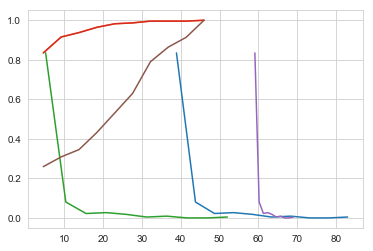

In [78]:
#pdf and cdf for age (survival status '2')
count1, bin_edges1 = np.histogram(haber_2["30"], bins=10, density = True)
pdf1 = count1/(sum(count1))
print(pdf1)
print(bin_edges1)
cdf= np.cumsum(pdf)
plt.plot(bin_edges1[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#axil_nodes
count1, bin_edges1 = np.histogram(haber_2["1"], bins= 10, density = True)
pdf1= count1/(sum(count1))
print(pdf1)
print(bin_edges1)
cdf=np.cumsum(pdf)
plt.plot(bin_edges1[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#year
count1, bin_edges1 = np.histogram(haber_2["64"], bins=10,density= True)
pdf1 = count1/(sum(count1))
print(pdf1)
print(bin_edges1)
cdf= np.cumsum(pdf1)
plt.plot(bin_edges1[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

In [87]:
# Mean, Variance, Standard Deviation

print("Mean")
print(np.mean(haber_1["30"]))

#Mean with outlier
print("Mean with outlier" , np.mean(np.append(haber_1["30"],10)))
print("std: ", np.std(haber_1["30"]))

Mean
52.11607142857143
Mean with outlier 51.92888888888889
std:  10.913004640364269


In [101]:
#Median, Percentile,MAD,IQR,Quantile

print("Median:")
print(np.median(haber_1["30"]))

#Median with outlier
print("Median with outlier", np.median(np.append(haber_1["30"],41)))

#percentile
print("Percentile")
print(np.percentile(haber_1["30"],np.arange(0,100,25)))

#Quantile
print("Quantile: ")
print(np.percentile(haber_1["30"],25))


#Median Absolute Deviation
from statsmodels import robust
print("MAD: ")
print(robust.mad(haber_1["30"]))

Median:
52.0
Median with outlier 52.0
Percentile
[30. 43. 52. 60.]
Quantile: 
43.0
MAD: 
13.343419966550417


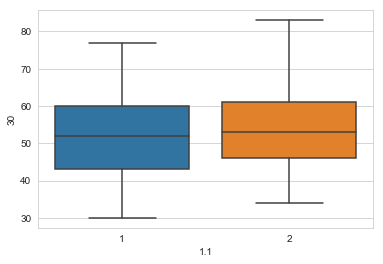

In [104]:
#BOX Plots and Wiskers
#age
sns.boxplot(x="1.1",y="30",data=haber)
plt.show()

By observing Box Plot:
*by min and max values of survival status_2 more points fall under this when compare to survival status_1 
min age=35,max=88,25% =45,50%=53,75%=61

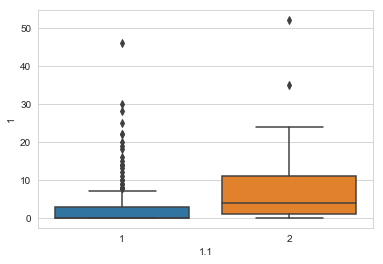

In [105]:
#axil_nodes
sns.boxplot(x="1.1",y="1",data=haber)
plt.show()

more axilnodes has the survival status_2
75%=11,max=25

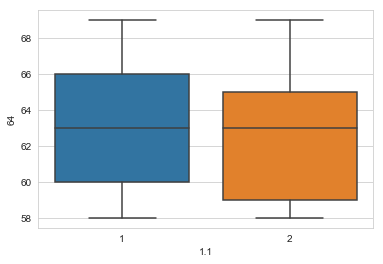

In [106]:
#year
sns.boxplot(x="1.1",y="64",data=haber)
plt.show()

By consedering the year's dont see much variation in min and max points.
But we can observe huge variation in survival status_2 for the 50% percentile

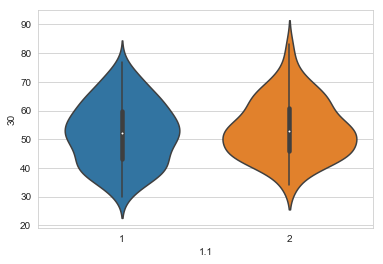

In [107]:
#Vilon Plot
#age
sns.violinplot(x="1.1",y="30",data=haber,size=8)
plt.show()

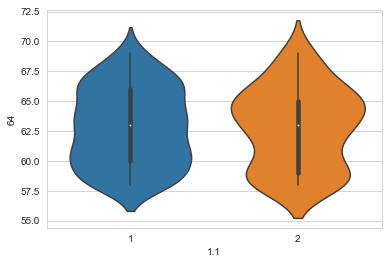

In [110]:
#year
sns.violinplot(x="1.1",y="64",data=haber,size=8)
plt.show()

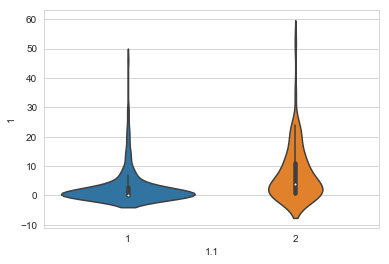

In [111]:
#axil_nodes
sns.violinplot(x="1.1",y="1",data=haber,size=8)
plt.show()

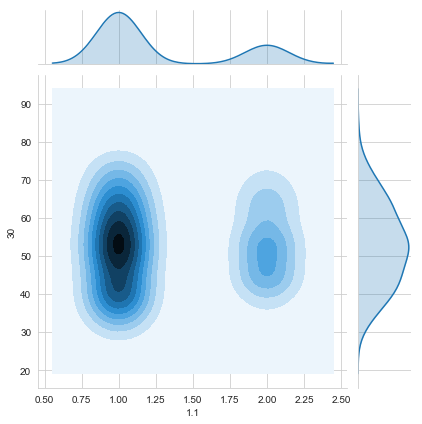

In [113]:
#contor plots for age
sns.jointplot(x="1.1",y="30",data =haber,kind="kde")
plt.show()

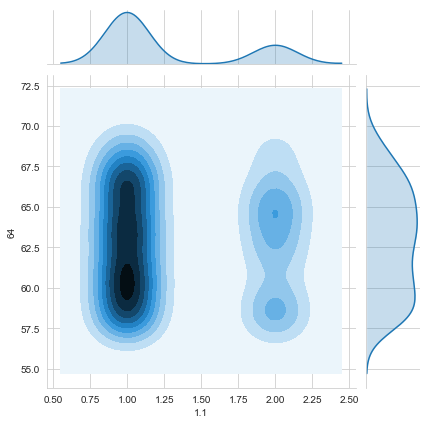

In [114]:
#year
sns.jointplot(x="1.1",y="64",data=haber, kind= "kde")
plt.show()

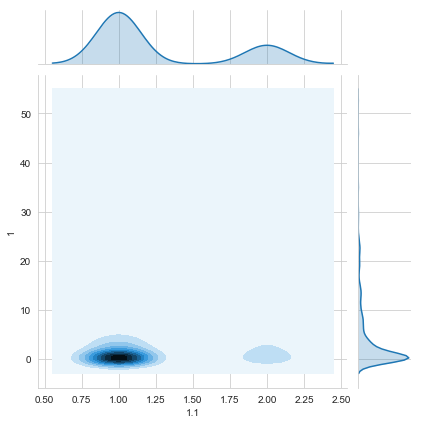

In [115]:
#axil_nodes
sns.jointplot(x="1.1",y="1",data=haber,kind="kde")
plt.show()

[0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


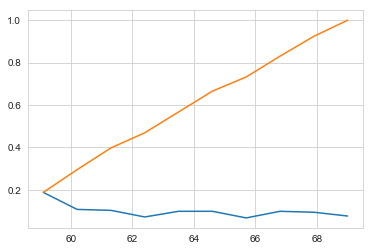

In [132]:
count, bin_edges = np.histogram(haber_1["64"], bins=10,density= True)
pdf = count/(sum(count))
print(pdf)
print(bin_edges)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


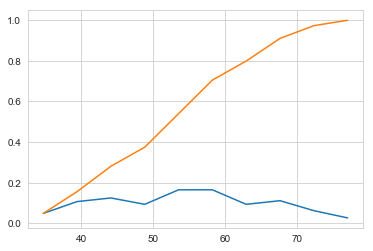

In [133]:
count, bin_edges =np.histogram(haber_1["30"], bins=10,density= True)
pdf =count/(sum(count))
print(pdf)
print(bin_edges)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)



[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


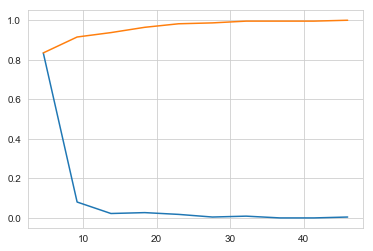

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


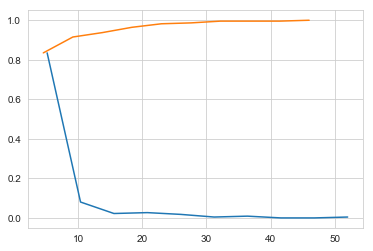

In [136]:
#cdf,pdf of axil_nodes

count, bin_edges = np.histogram(haber_1["1"], bins=10, density = True)
pdf= count/(sum(count))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show();

count1, bin_edges1 = np.histogram(haber_2["1"], bins= 10, density = True)
pdf1= count1/(sum(count1))
print(pdf1)
print(bin_edges1)
cdf=np.cumsum(pdf)
plt.plot(bin_edges1[1:],pdf)
plt.plot(bin_edges[1:],cdf)

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


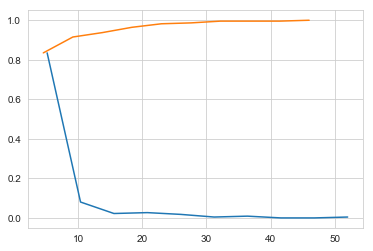

In [135]:
count1, bin_edges1 = np.histogram(haber_2["1"], bins= 10, density = True)
pdf1= count1/(sum(count1))
print(pdf1)
print(bin_edges1)
cdf=np.cumsum(pdf)
plt.plot(bin_edges1[1:],pdf)
plt.plot(bin_edges[1:],cdf)